Dataset : https://drive.google.com/drive/folders/1kyRJT3bmx2oKr5Q1bG_XIAe1dab30O3v?usp=drive_link

# **ResNet152V2**

**80% : 20%**

Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Epoch 1/10


C:\Users\Fenny Jong\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 188s 4s/step - accuracy: 0.7403 - loss: 0.6898 - val_accuracy: 0.8967 - val_loss: 0.2498
Epoch 2/10


C:\Users\Fenny Jong\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 155s 4s/step - accuracy: 0.9044 - loss: 0.2339 - val_accuracy: 0.9100 - val_loss: 0.2330
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 153s 4s/step - accuracy: 0.9445 - loss: 0.1603 - val_accuracy: 0.9367 - val_loss: 0.1889
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 169s 4s/step - accuracy: 0.9239 - loss: 0.2123 - val_accuracy: 0.9133 - val_loss: 0.2028
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 156s 4s/step - accuracy: 0.9420 - loss: 0.1682 - val_accuracy: 0.9367 - val_loss: 0.1751
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step
Cl

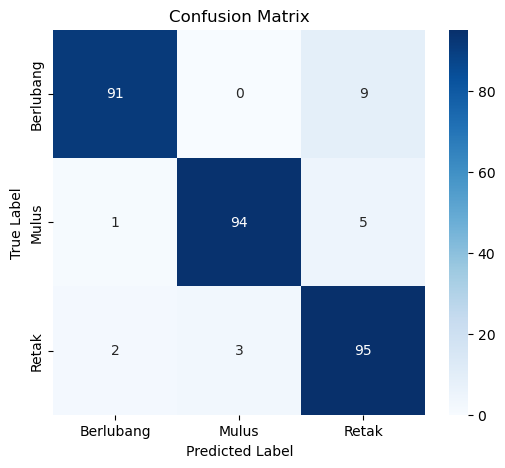

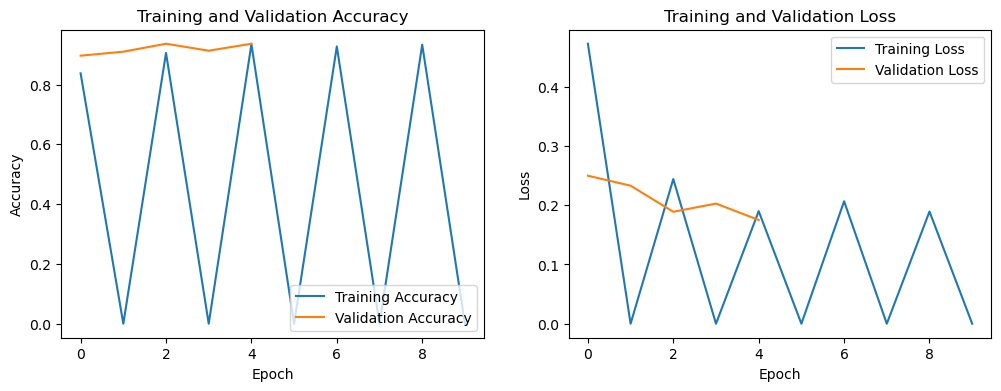

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras import layers, Sequential
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of classes
num_classes = 3  # mulus, berlubang, retak

# Paths for the dataset directory
data_dir = 'dataset'

# ImageDataGenerator for data preprocessing with 80-20 split
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data will be used for validation
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator (shuffle=False to ensure correct label order)
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load ResNet152V2 pre-trained model without the top layer
pre_trained_model = ResNet152V2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Make all the layers non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

# Build the model using ResNet152V2 as the base
model = Sequential([
    pre_trained_model,
    layers.GlobalAveragePooling2D(),  # Replace Flatten with GlobalAveragePooling for better performance
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with correct steps per epoch
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Fixed number of epochs
    steps_per_epoch=len(train_generator),  # Use full training dataset
    validation_steps=len(validation_generator)  # Use full validation dataset
)

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted class labels
y_true = validation_generator.classes  # True class labels

# Print classification report
class_names = list(validation_generator.class_indices.keys())
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=class_names))

# Print true vs predicted classes
print("\nTrue Class vs Predicted Class:")
for true_class, pred_class in zip(y_true, y_pred):
    true_label = class_names[true_class]  # True class name
    pred_label = class_names[pred_class]  # Predicted class name
    print(f'True Class: {true_label}, Predicted Class: {pred_label}')

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Epoch 1/20


C:\Users\Fenny Jong\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.7033 - loss: 0.7892 - val_accuracy: 0.8933 - val_loss: 0.2551
Epoch 2/20


C:\Users\Fenny Jong\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.9098 - loss: 0.2421 - val_accuracy: 0.9033 - val_loss: 0.2346
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.9320 - loss: 0.1880 - val_accuracy: 0.9300 - val_loss: 0.1830
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.9413 - loss: 0.1690 - val_accuracy: 0.9067 - val_loss: 0.2321
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.9311 - loss: 0.1957 - val_accuracy: 0.9133 - val_loss: 0.1970
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 13

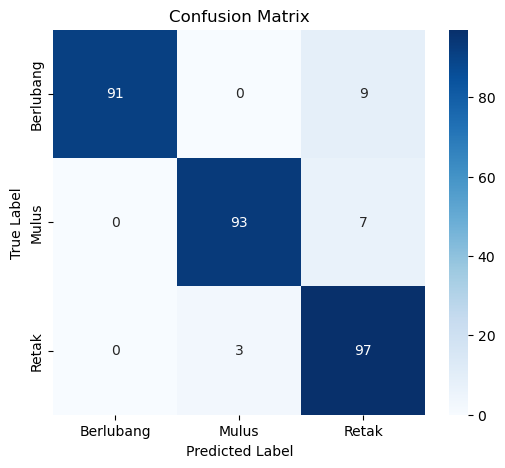

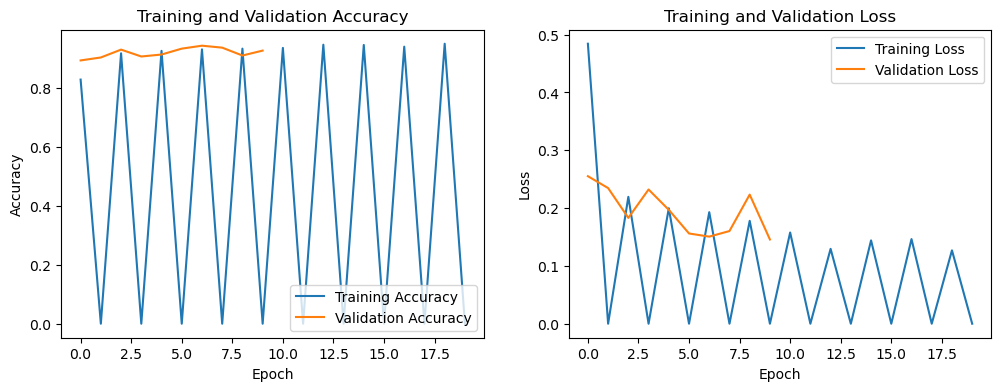

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras import layers, Sequential
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of classes
num_classes = 3  # mulus, berlubang, retak

# Paths for the dataset directory
data_dir = 'dataset'

# ImageDataGenerator for data preprocessing with 80-20 split
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data will be used for validation
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator (shuffle=False to ensure correct label order)
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load ResNet152V2 pre-trained model without the top layer
pre_trained_model = ResNet152V2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Make all the layers non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

# Build the model using ResNet152V2 as the base
model = Sequential([
    pre_trained_model,
    layers.GlobalAveragePooling2D(),  # Replace Flatten with GlobalAveragePooling for better performance
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with correct steps per epoch
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,  # Fixed number of epochs
    steps_per_epoch=len(train_generator),  # Use full training dataset
    validation_steps=len(validation_generator)  # Use full validation dataset
)

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted class labels
y_true = validation_generator.classes  # True class labels

# Print classification report
class_names = list(validation_generator.class_indices.keys())
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=class_names))

# Print true vs predicted classes
print("\nTrue Class vs Predicted Class:")
for true_class, pred_class in zip(y_true, y_pred):
    true_label = class_names[true_class]  # True class name
    pred_label = class_names[pred_class]  # Predicted class name
    print(f'True Class: {true_label}, Predicted Class: {pred_label}')

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Epoch 1/30


C:\Users\Fenny Jong\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.7172 - loss: 0.7763 - val_accuracy: 0.9067 - val_loss: 0.2688
Epoch 2/30


C:\Users\Fenny Jong\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.9317 - loss: 0.2139 - val_accuracy: 0.8967 - val_loss: 0.2470
Epoch 4/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.9281 - loss: 0.1821 - val_accuracy: 0.9167 - val_loss: 0.2050
Epoch 6/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.9358 - loss: 0.1842 - val_accuracy: 0.9033 - val_loss: 0.2609
Epoch 8/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.9310 - loss: 0.1960 - val_accuracy: 0.9100 - val_loss: 0.2279
Epoch 10/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/30
38/38 ━━━━━━━━━━━━━━━━━━━━ 12

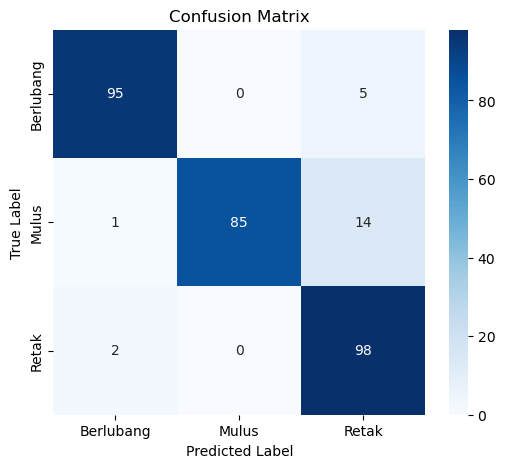

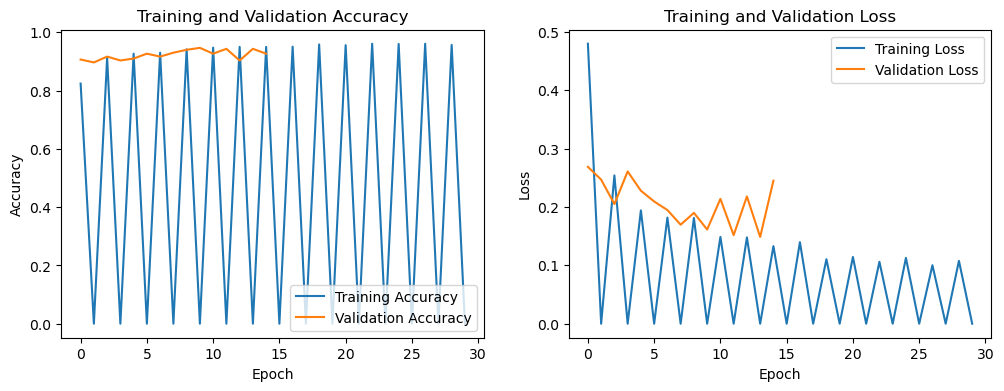

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras import layers, Sequential
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of classes
num_classes = 3  # mulus, berlubang, retak

# Paths for the dataset directory
data_dir = 'dataset'

# ImageDataGenerator for data preprocessing with 80-20 split
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data will be used for validation
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator (shuffle=False to ensure correct label order)
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load ResNet152V2 pre-trained model without the top layer
pre_trained_model = ResNet152V2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Make all the layers non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

# Build the model using ResNet152V2 as the base
model = Sequential([
    pre_trained_model,
    layers.GlobalAveragePooling2D(),  # Replace Flatten with GlobalAveragePooling for better performance
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with correct steps per epoch
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,  # Fixed number of epochs
    steps_per_epoch=len(train_generator),  # Use full training dataset
    validation_steps=len(validation_generator)  # Use full validation dataset
)

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted class labels
y_true = validation_generator.classes  # True class labels

# Print classification report
class_names = list(validation_generator.class_indices.keys())
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=class_names))

# Print true vs predicted classes
print("\nTrue Class vs Predicted Class:")
for true_class, pred_class in zip(y_true, y_pred):
    true_label = class_names[true_class]  # True class name
    pred_label = class_names[pred_class]  # Predicted class name
    print(f'True Class: {true_label}, Predicted Class: {pred_label}')

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Epoch 1/40


C:\Users\Fenny Jong\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.7694 - loss: 0.6148 - val_accuracy: 0.8433 - val_loss: 0.3787
Epoch 2/40


C:\Users\Fenny Jong\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.9066 - loss: 0.2941 - val_accuracy: 0.9033 - val_loss: 0.2426
Epoch 4/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.9140 - loss: 0.2151 - val_accuracy: 0.8900 - val_loss: 0.2671
Epoch 6/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.9419 - loss: 0.1771 - val_accuracy: 0.9333 - val_loss: 0.1526
Epoch 8/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.9331 - loss: 0.1838 - val_accuracy: 0.9300 - val_loss: 0.1617
Epoch 10/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 12

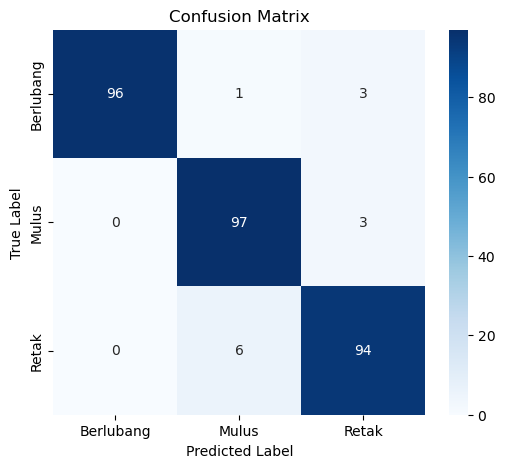

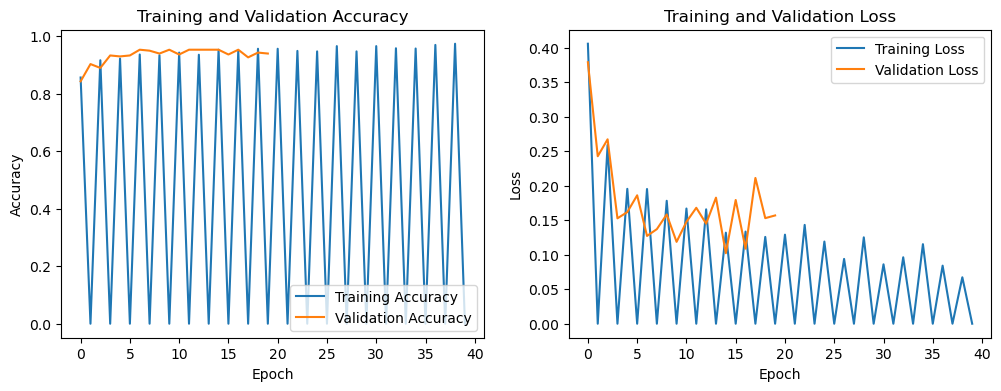

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras import layers, Sequential
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of classes
num_classes = 3   # mulus, berlubang, retak

# Paths for the dataset directory
data_dir = 'dataset'

# ImageDataGenerator for data preprocessing with 80-20 split
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data will be used for validation
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator (shuffle=False to ensure correct label order)
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load ResNet152V2 pre-trained model without the top layer
pre_trained_model = ResNet152V2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Make all the layers non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

# Build the model using ResNet152V2 as the base
model = Sequential([
    pre_trained_model,
    layers.GlobalAveragePooling2D(),  # Replace Flatten with GlobalAveragePooling for better performance
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with correct steps per epoch
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=40,  # Fixed number of epochs
    steps_per_epoch=len(train_generator),  # Use full training dataset
    validation_steps=len(validation_generator)  # Use full validation dataset
)

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted class labels
y_true = validation_generator.classes  # True class labels

# Print classification report
class_names = list(validation_generator.class_indices.keys())
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=class_names))

# Print true vs predicted classes
print("\nTrue Class vs Predicted Class:")
for true_class, pred_class in zip(y_true, y_pred):
    true_label = class_names[true_class]  # True class name
    pred_label = class_names[pred_class]  # Predicted class name
    print(f'True Class: {true_label}, Predicted Class: {pred_label}')

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Epoch 1/50


C:\Users\Fenny Jong\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.7542 - loss: 0.6705 - val_accuracy: 0.8867 - val_loss: 0.2765
Epoch 2/50


C:\Users\Fenny Jong\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.8966 - loss: 0.3025 - val_accuracy: 0.8933 - val_loss: 0.2126
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.9301 - loss: 0.1765 - val_accuracy: 0.8967 - val_loss: 0.2665
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.9246 - loss: 0.1823 - val_accuracy: 0.9267 - val_loss: 0.1655
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.9522 - loss: 0.1414 - val_accuracy: 0.8967 - val_loss: 0.2736
Epoch 10/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 13

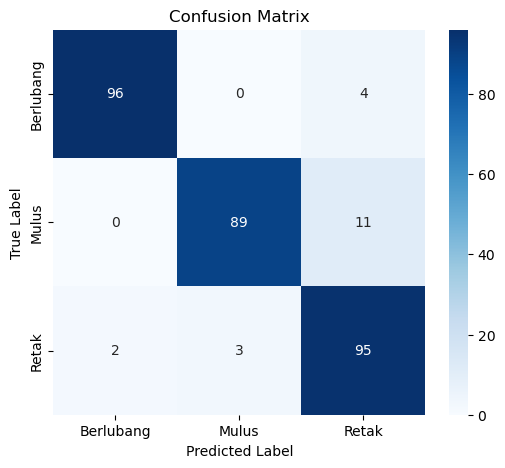

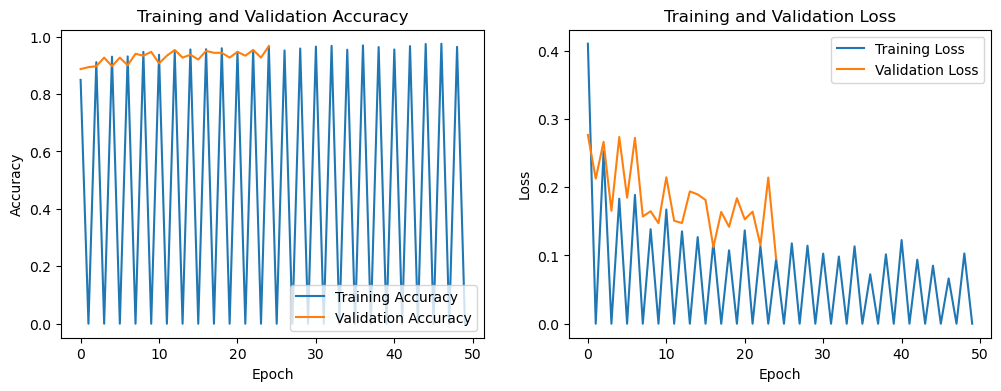

In [5]:
##### import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras import layers, Sequential
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of classes
num_classes = 3  # mulus, berlubang, retak

# Paths for the dataset directory
data_dir = 'dataset'

# ImageDataGenerator for data preprocessing with 80-20 split
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data will be used for validation
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator (shuffle=False to ensure correct label order)
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load ResNet152V2 pre-trained model without the top layer
pre_trained_model = ResNet152V2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Make all the layers non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

# Build the model using ResNet152V2 as the base
model = Sequential([
    pre_trained_model,
    layers.GlobalAveragePooling2D(),  # Replace Flatten with GlobalAveragePooling for better performance
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with correct steps per epoch
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,  # Fixed number of epochs
    steps_per_epoch=len(train_generator),  # Use full training dataset
    validation_steps=len(validation_generator)  # Use full validation dataset
)

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted class labels
y_true = validation_generator.classes  # True class labels

# Print classification report
class_names = list(validation_generator.class_indices.keys())
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=class_names))

# Print true vs predicted classes
print("\nTrue Class vs Predicted Class:")
for true_class, pred_class in zip(y_true, y_pred):
    true_label = class_names[true_class]  # True class name
    pred_label = class_names[pred_class]  # Predicted class name
    print(f'True Class: {true_label}, Predicted Class: {pred_label}')

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**70% : 30%**

Found 1050 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Epoch 1/10


C:\Users\Fenny Jong\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 133s 4s/step - accuracy: 0.7281 - loss: 0.6749 - val_accuracy: 0.9067 - val_loss: 0.2760
Epoch 2/10


C:\Users\Fenny Jong\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.9120 - loss: 0.2776 - val_accuracy: 0.8889 - val_loss: 0.2894
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 115s 3s/step - accuracy: 0.9286 - loss: 0.1948 - val_accuracy: 0.9289 - val_loss: 0.1843
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 114s 3s/step - accuracy: 0.9324 - loss: 0.1699 - val_accuracy: 0.8933 - val_loss: 0.2593
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.9304 - loss: 0.1963 - val_accuracy: 0.9311 - val_loss: 0.1544
Epoch 10/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step
Cl

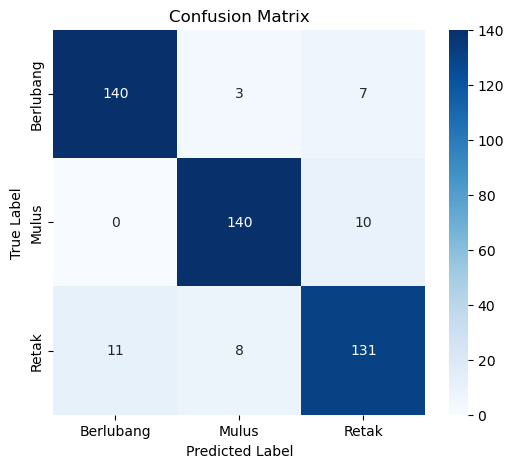

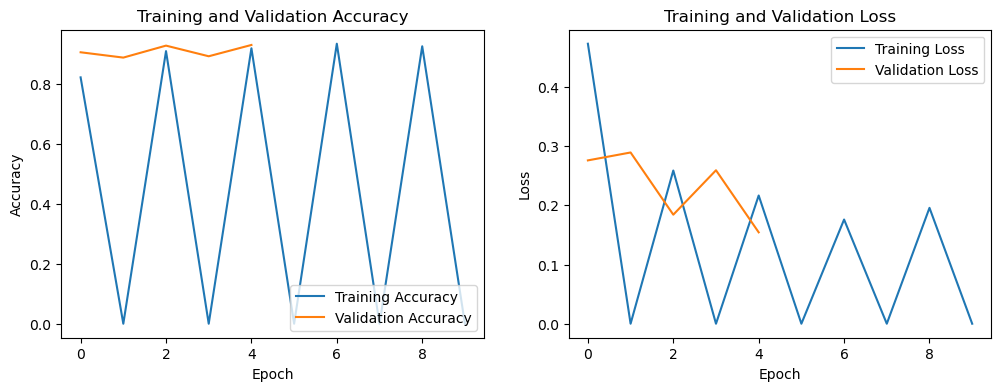

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras import layers, Sequential
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of classes
num_classes = 3  # mulus, berlubang, retak

# Paths for the dataset directory
data_dir = 'dataset'

# ImageDataGenerator for data preprocessing with 80-20 split
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # 30% of data will be used for validation
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator (shuffle=False to ensure correct label order)
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load ResNet152V2 pre-trained model without the top layer
pre_trained_model = ResNet152V2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Make all the layers non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

# Build the model using ResNet152V2 as the base
model = Sequential([
    pre_trained_model,
    layers.GlobalAveragePooling2D(),  # Replace Flatten with GlobalAveragePooling for better performance
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with correct steps per epoch
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Fixed number of epochs
    steps_per_epoch=len(train_generator),  # Use full training dataset
    validation_steps=len(validation_generator)  # Use full validation dataset
)

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted class labels
y_true = validation_generator.classes  # True class labels

# Print classification report
class_names = list(validation_generator.class_indices.keys())
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=class_names))

# Print true vs predicted classes
print("\nTrue Class vs Predicted Class:")
for true_class, pred_class in zip(y_true, y_pred):
    true_label = class_names[true_class]  # True class name
    pred_label = class_names[pred_class]  # Predicted class name
    print(f'True Class: {true_label}, Predicted Class: {pred_label}')

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 1050 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Epoch 1/20


C:\Users\Fenny Jong\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.7536 - loss: 0.6434 - val_accuracy: 0.8311 - val_loss: 0.4693
Epoch 2/20


C:\Users\Fenny Jong\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 130s 4s/step - accuracy: 0.9028 - loss: 0.2911 - val_accuracy: 0.8622 - val_loss: 0.3477
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.9121 - loss: 0.2296 - val_accuracy: 0.9178 - val_loss: 0.2020
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.9330 - loss: 0.1783 - val_accuracy: 0.9022 - val_loss: 0.2203
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.9312 - loss: 0.1755 - val_accuracy: 0.8956 - val_loss: 0.2701
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 11

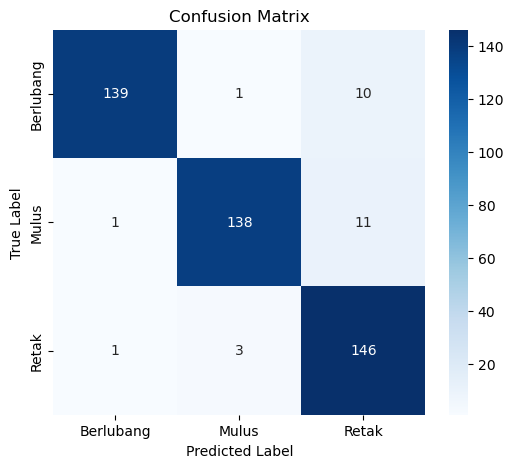

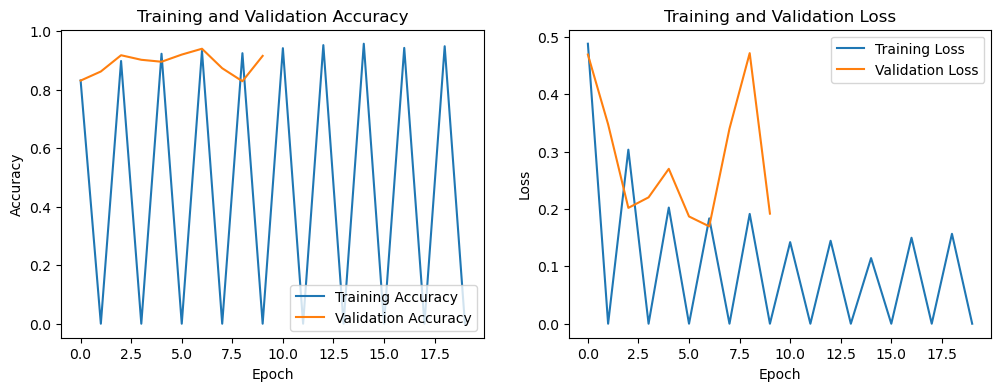

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras import layers, Sequential
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of classes
num_classes = 3  # mulus, berlubang, retak

# Paths for the dataset directory
data_dir = 'dataset'

# ImageDataGenerator for data preprocessing with 80-20 split
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator (shuffle=False to ensure correct label order)
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load ResNet152V2 pre-trained model without the top layer
pre_trained_model = ResNet152V2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Make all the layers non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

# Build the model using ResNet152V2 as the base
model = Sequential([
    pre_trained_model,
    layers.GlobalAveragePooling2D(),  # Replace Flatten with GlobalAveragePooling for better performance
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with correct steps per epoch
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,  # Fixed number of epochs
    steps_per_epoch=len(train_generator),  # Use full training dataset
    validation_steps=len(validation_generator)  # Use full validation dataset
)

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted class labels
y_true = validation_generator.classes  # True class labels

# Print classification report
class_names = list(validation_generator.class_indices.keys())
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=class_names))

# Print true vs predicted classes
print("\nTrue Class vs Predicted Class:")
for true_class, pred_class in zip(y_true, y_pred):
    true_label = class_names[true_class]  # True class name
    pred_label = class_names[pred_class]  # Predicted class name
    print(f'True Class: {true_label}, Predicted Class: {pred_label}')

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 1050 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Epoch 1/30


C:\Users\Fenny Jong\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 131s 4s/step - accuracy: 0.7016 - loss: 0.7450 - val_accuracy: 0.9089 - val_loss: 0.2722
Epoch 2/30


C:\Users\Fenny Jong\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.9047 - loss: 0.3000 - val_accuracy: 0.9067 - val_loss: 0.2391
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 127s 4s/step - accuracy: 0.9412 - loss: 0.1577 - val_accuracy: 0.9000 - val_loss: 0.2119
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step - accuracy: 0.9355 - loss: 0.1523 - val_accuracy: 0.8911 - val_loss: 0.2469
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 127s 4s/step - accuracy: 0.9336 - loss: 0.1573 - val_accuracy: 0.8867 - val_loss: 0.3032
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 12

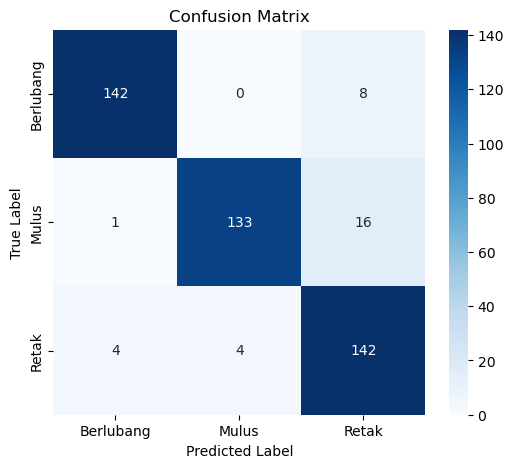

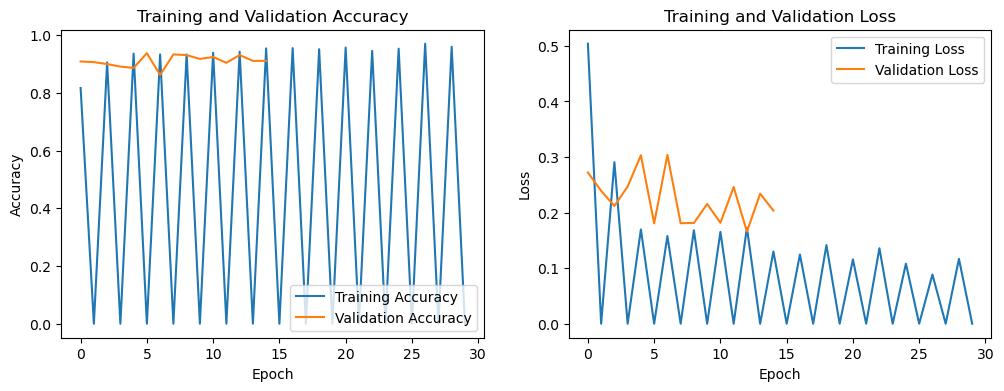

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras import layers, Sequential
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of classes
num_classes = 3   # mulus, berlubang, retak

# Paths for the dataset directory
data_dir = 'dataset'

# ImageDataGenerator for data preprocessing with 80-20 split
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # 30% of data will be used for validation
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator (shuffle=False to ensure correct label order)
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load ResNet152V2 pre-trained model without the top layer
pre_trained_model = ResNet152V2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Make all the layers non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

# Build the model using ResNet152V2 as the base
model = Sequential([
    pre_trained_model,
    layers.GlobalAveragePooling2D(),  # Replace Flatten with GlobalAveragePooling for better performance
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with correct steps per epoch
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,  # Fixed number of epochs
    steps_per_epoch=len(train_generator),  # Use full training dataset
    validation_steps=len(validation_generator)  # Use full validation dataset
)

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted class labels
y_true = validation_generator.classes  # True class labels

# Print classification report
class_names = list(validation_generator.class_indices.keys())
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=class_names))

# Print true vs predicted classes
print("\nTrue Class vs Predicted Class:")
for true_class, pred_class in zip(y_true, y_pred):
    true_label = class_names[true_class]  # True class name
    pred_label = class_names[pred_class]  # Predicted class name
    print(f'True Class: {true_label}, Predicted Class: {pred_label}')

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 1050 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Epoch 1/40


C:\Users\Fenny Jong\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 162s 4s/step - accuracy: 0.7417 - loss: 0.6829 - val_accuracy: 0.9178 - val_loss: 0.2172
Epoch 2/40


C:\Users\Fenny Jong\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.8931 - loss: 0.2739 - val_accuracy: 0.9156 - val_loss: 0.2377
Epoch 4/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.9242 - loss: 0.2202 - val_accuracy: 0.9133 - val_loss: 0.2415
Epoch 6/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.9372 - loss: 0.1599 - val_accuracy: 0.9222 - val_loss: 0.1845
Epoch 8/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.9493 - loss: 0.1433 - val_accuracy: 0.9222 - val_loss: 0.1913
Epoch 10/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 13

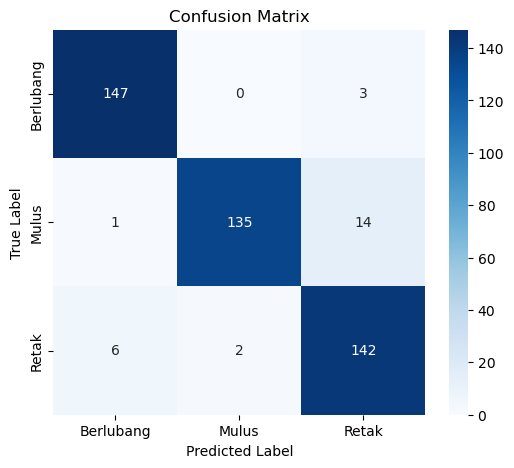

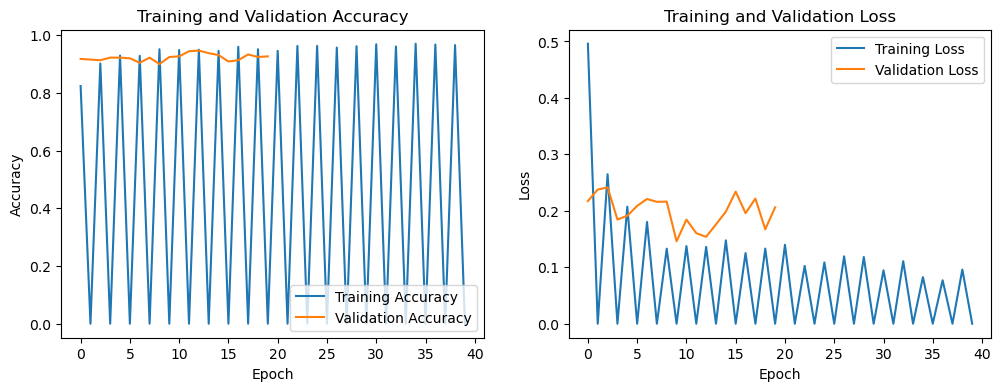

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras import layers, Sequential
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of classes
num_classes = 3  # mulus, berlubang, retak

# Paths for the dataset directory
data_dir = 'dataset'

# ImageDataGenerator for data preprocessing with 80-20 split
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # 30% of data will be used for validation
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator (shuffle=False to ensure correct label order)
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load ResNet152V2 pre-trained model without the top layer
pre_trained_model = ResNet152V2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Make all the layers non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

# Build the model using ResNet152V2 as the base
model = Sequential([
    pre_trained_model,
    layers.GlobalAveragePooling2D(),  # Replace Flatten with GlobalAveragePooling for better performance
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with correct steps per epoch
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=40,  # Fixed number of epochs
    steps_per_epoch=len(train_generator),  # Use full training dataset
    validation_steps=len(validation_generator)  # Use full validation dataset
)

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted class labels
y_true = validation_generator.classes  # True class labels

# Print classification report
class_names = list(validation_generator.class_indices.keys())
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=class_names))

# Print true vs predicted classes
print("\nTrue Class vs Predicted Class:")
for true_class, pred_class in zip(y_true, y_pred):
    true_label = class_names[true_class]  # True class name
    pred_label = class_names[pred_class]  # Predicted class name
    print(f'True Class: {true_label}, Predicted Class: {pred_label}')

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 1050 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Epoch 1/50


C:\Users\Fenny Jong\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 156s 4s/step - accuracy: 0.7159 - loss: 0.7284 - val_accuracy: 0.8978 - val_loss: 0.2665
Epoch 2/50


C:\Users\Fenny Jong\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 134s 4s/step - accuracy: 0.8856 - loss: 0.3008 - val_accuracy: 0.9111 - val_loss: 0.2534
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 135s 4s/step - accuracy: 0.9453 - loss: 0.1725 - val_accuracy: 0.8844 - val_loss: 0.3056
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.9262 - loss: 0.1972 - val_accuracy: 0.8911 - val_loss: 0.2537
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.9397 - loss: 0.1703 - val_accuracy: 0.9378 - val_loss: 0.1720
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 13

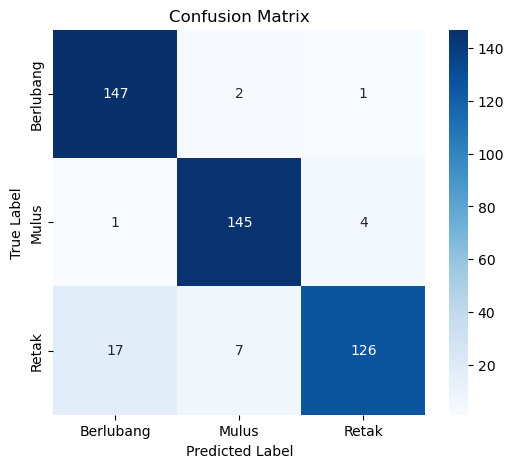

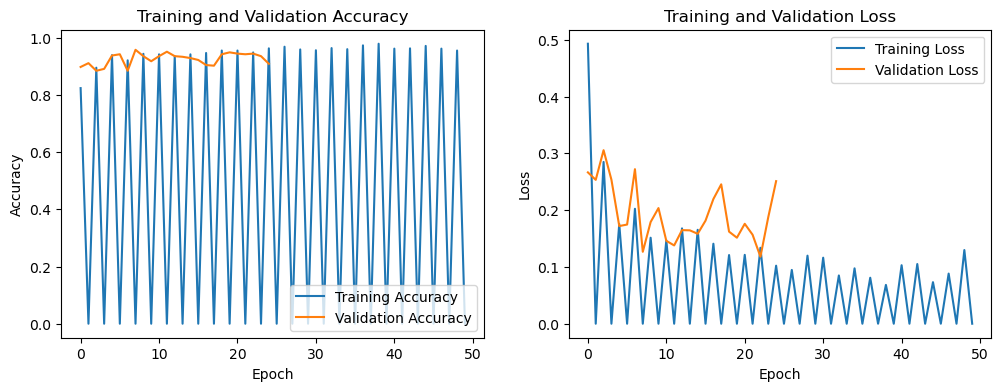

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras import layers, Sequential
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of classes
num_classes = 3   # mulus, berlubang, retak

# Paths for the dataset directory
data_dir = 'dataset'

# ImageDataGenerator for data preprocessing with 80-20 split
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # 30% of data will be used for validation
)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data generator (shuffle=False to ensure correct label order)
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load ResNet152V2 pre-trained model without the top layer
pre_trained_model = ResNet152V2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Make all the layers non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

# Build the model using ResNet152V2 as the base
model = Sequential([
    pre_trained_model,
    layers.GlobalAveragePooling2D(),  # Replace Flatten with GlobalAveragePooling for better performance
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with correct steps per epoch
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,  # Fixed number of epochs
    steps_per_epoch=len(train_generator),  # Use full training dataset
    validation_steps=len(validation_generator)  # Use full validation dataset
)

# Evaluate the model
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)  # Get predicted class labels
y_true = validation_generator.classes  # True class labels

# Print classification report
class_names = list(validation_generator.class_indices.keys())
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=class_names))

# Print true vs predicted classes
print("\nTrue Class vs Predicted Class:")
for true_class, pred_class in zip(y_true, y_pred):
    true_label = class_names[true_class]  # True class name
    pred_label = class_names[pred_class]  # Predicted class name
    print(f'True Class: {true_label}, Predicted Class: {pred_label}')

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **KNN**

In [11]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops

# Menghitung fitur GLCM untuk sudut 0, 45, 90, 135
def calc_glcm_all_angles(img, label, c_label, props, dists=[1], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, sym=True, norm=True):
    glcm = graycomatrix(img, distances=dists, angles=agls, levels=levels, symmetric=sym, normed=norm)
    feature = []
    glcm_props = [prop for name in props for prop in graycoprops(glcm, name)[0]]

    for item in glcm_props:
        feature.append(item)

    feature.append(label)
    feature.append(c_label)
    return feature

# Daftar properti GLCM
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']
glcm_all_angles = []

# Path ke folder dataset
path = 'dataset'

# Iterasi melalui gambar dan ekstraksi fitur
for class_label in os.listdir(path):
    # Pastikan hanya memproses folder kelas
    if os.path.isdir(os.path.join(path, class_label)):
        class_folder_path = os.path.join(path, class_label)
        for file_name in os.listdir(class_folder_path):
            file_path = os.path.join(class_folder_path, file_name)

            # Baca gambar dan ubah ke grayscale
            img = cv2.imread(file_path)
            if img is not None:
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                # Hitung fitur GLCM untuk gambar ini
                glcm_features = calc_glcm_all_angles(gray_img, class_label, file_name, properties)
                glcm_all_angles.append(glcm_features)

# Siapkan kolom untuk DataFrame
columns = []
angles = ['0', '45', '90', '135']
for name in properties:
    for ang in angles:
        columns.append(f"{name}_{ang}")
columns.append("class")
columns.append("file_name")

# Buat DataFrame dari hasil ekstraksi fitur
df_glcm = pd.DataFrame(glcm_all_angles, columns=columns)

# Tampilkan DataFrame hasil ekstraksi fitur
print("Hasil ekstraksi fitur GLCM:")
print(df_glcm.head())

# Path untuk menyimpan file CSV di folder lokal
csv_path = os.path.join(path, 'extracted_features_glcm.csv')

# Simpan DataFrame sebagai file CSV
df_glcm.to_csv(csv_path, index=False)
print(f"Fitur disimpan di {csv_path}")

Hasil ekstraksi fitur GLCM:
   dissimilarity_0  dissimilarity_45  dissimilarity_90  dissimilarity_135  \
0        20.722620         25.926858         20.397425          23.835337   
1        18.619353         23.583293         17.222018          21.253040   
2         9.563177         11.649277          8.507135          12.404917   
3         7.962899         11.096956          9.127871          12.039340   
4         9.303924         11.256205          6.955295          11.592980   

   correlation_0  correlation_45  correlation_90  correlation_135  \
0       0.836178        0.733896        0.820104         0.778324   
1       0.828309        0.720079        0.852846         0.778025   
2       0.963191        0.946417        0.970831         0.940425   
3       0.935603        0.875457        0.911846         0.855534   
4       0.971956        0.960484        0.983936         0.957809   

   homogeneity_0  homogeneity_45  ...     ASM_0    ASM_45    ASM_90   ASM_135  \
0       0.062

In [12]:
# Konversi fitur GLCM ke dalam array NumPy
X = df_glcm.iloc[:, :-2].values  # Ambil semua kolom kecuali kolom 'class' dan 'file_name'
y = df_glcm['class'].values  # Ambil kolom 'class' sebagai label

# **80% : 20%**

--- Iterasi 1 dengan random_state=1 ---
Waktu pelatihan: 0.0058 detik
Akurasi: 55.67%
Laporan Klasifikasi:
              precision    recall  f1-score   support

   Berlubang       0.51      0.74      0.60        95
       Mulus       0.74      0.54      0.63       107
       Retak       0.46      0.40      0.43        98

    accuracy                           0.56       300
   macro avg       0.57      0.56      0.55       300
weighted avg       0.58      0.56      0.55       300



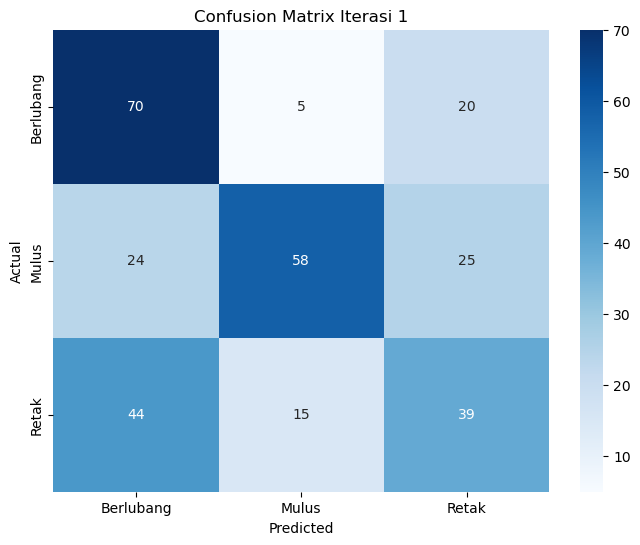

--- Iterasi 2 dengan random_state=10 ---
Waktu pelatihan: 0.0000 detik
Akurasi: 54.00%
Laporan Klasifikasi:
              precision    recall  f1-score   support

   Berlubang       0.49      0.65      0.56       101
       Mulus       0.69      0.63      0.66        94
       Retak       0.46      0.35      0.40       105

    accuracy                           0.54       300
   macro avg       0.55      0.54      0.54       300
weighted avg       0.54      0.54      0.53       300



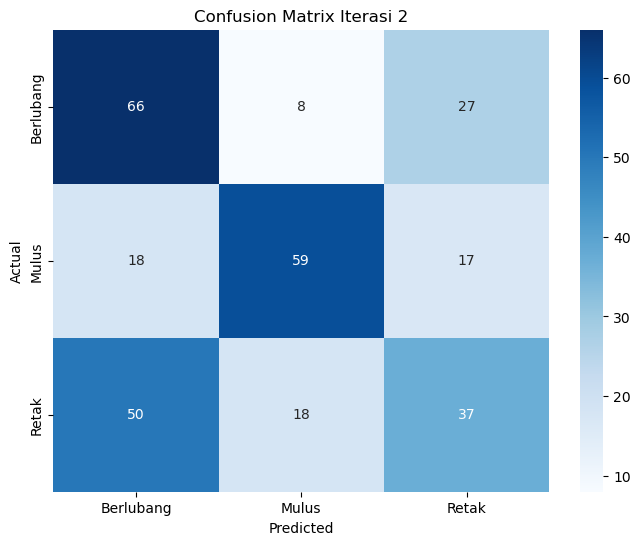

--- Iterasi 3 dengan random_state=100 ---
Waktu pelatihan: 0.0000 detik
Akurasi: 58.67%
Laporan Klasifikasi:
              precision    recall  f1-score   support

   Berlubang       0.54      0.66      0.59        96
       Mulus       0.73      0.73      0.73       107
       Retak       0.46      0.36      0.40        97

    accuracy                           0.59       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.58      0.59      0.58       300



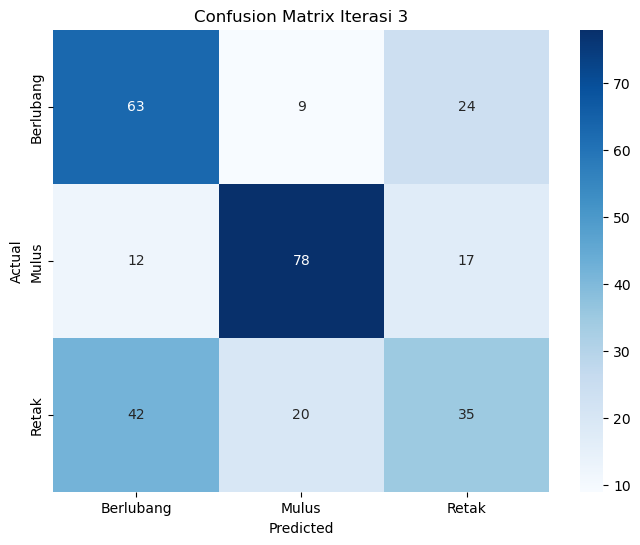

--- Iterasi 4 dengan random_state=1000 ---
Waktu pelatihan: 0.0109 detik
Akurasi: 56.33%
Laporan Klasifikasi:
              precision    recall  f1-score   support

   Berlubang       0.49      0.65      0.56        97
       Mulus       0.69      0.74      0.72        86
       Retak       0.54      0.36      0.43       117

    accuracy                           0.56       300
   macro avg       0.57      0.58      0.57       300
weighted avg       0.57      0.56      0.55       300



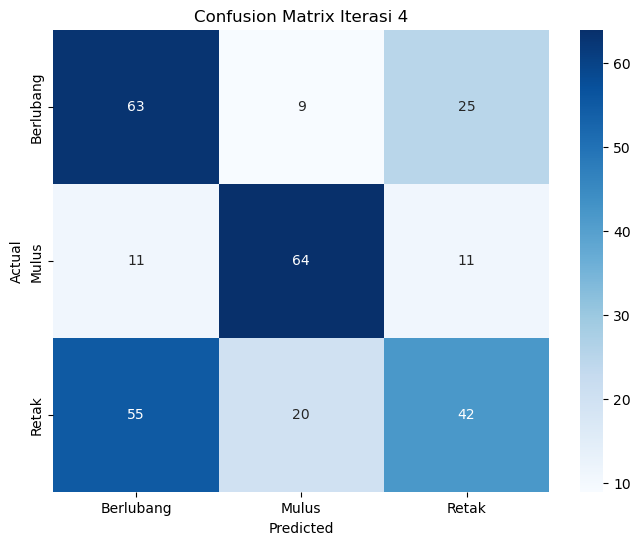

--- Iterasi 5 dengan random_state=10000 ---
Waktu pelatihan: 0.0000 detik
Akurasi: 55.67%
Laporan Klasifikasi:
              precision    recall  f1-score   support

   Berlubang       0.50      0.71      0.59        94
       Mulus       0.71      0.55      0.62       102
       Retak       0.50      0.42      0.46       104

    accuracy                           0.56       300
   macro avg       0.57      0.56      0.56       300
weighted avg       0.57      0.56      0.55       300



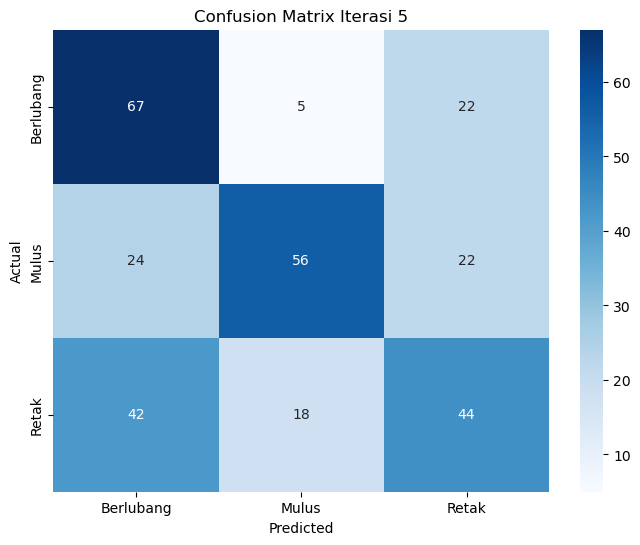

Rata-rata Akurasi selama 5 iterasi: 56.07%


In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time  # Import modul time untuk menghitung waktu

# Konversi fitur GLCM ke dalam array NumPy
X = df_glcm.iloc[:, :-2].values  # Ambil semua kolom kecuali kolom 'class' dan 'file_name'
y = df_glcm['class'].values  # Ambil kolom 'class' sebagai label

# Definisikan random states untuk setiap iterasi
random_states = [1, 10, 100, 1000, 10000]

# List untuk menyimpan akurasi setiap iterasi
accuracies = []

# Jalankan model 5 kali dengan random state yang ditentukan
for idx, random_state in enumerate(random_states):
    print(f"--- Iterasi {idx + 1} dengan random_state={random_state} ---")

    # Pembagian data menjadi 80% training dan 20% testing dengan random state yang spesifik
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Inisialisasi model KNN dengan jumlah tetangga terdekat
    model = KNeighborsClassifier(n_neighbors=3)

    # Mulai pengukuran waktu pelatihan
    start_time = time.time()

    # Melatih model
    model.fit(X_train, y_train)

    # Hitung waktu pelatihan
    training_time = time.time() - start_time
    print(f"Waktu pelatihan: {training_time:.4f} detik")

    # Prediksi pada set pengujian
    y_pred = model.predict(X_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)  # Simpan akurasi untuk iterasi ini
    print(f"Akurasi: {accuracy * 100:.2f}%")

    # Cetak laporan klasifikasi yang lebih detail
    print("Laporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

    # Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix Iterasi {idx + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Hitung dan cetak rata-rata akurasi
average_accuracy = np.mean(accuracies)
print(f"Rata-rata Akurasi selama 5 iterasi: {average_accuracy * 100:.2f}%")

# **70% : 30%**

--- Iterasi 1 dengan random_state=1 ---
Waktu pelatihan: 0.0022 detik
Akurasi: 56.22%
Laporan Klasifikasi:
              precision    recall  f1-score   support

   Berlubang       0.53      0.71      0.61       149
       Mulus       0.72      0.55      0.62       153
       Retak       0.47      0.43      0.45       148

    accuracy                           0.56       450
   macro avg       0.58      0.56      0.56       450
weighted avg       0.58      0.56      0.56       450



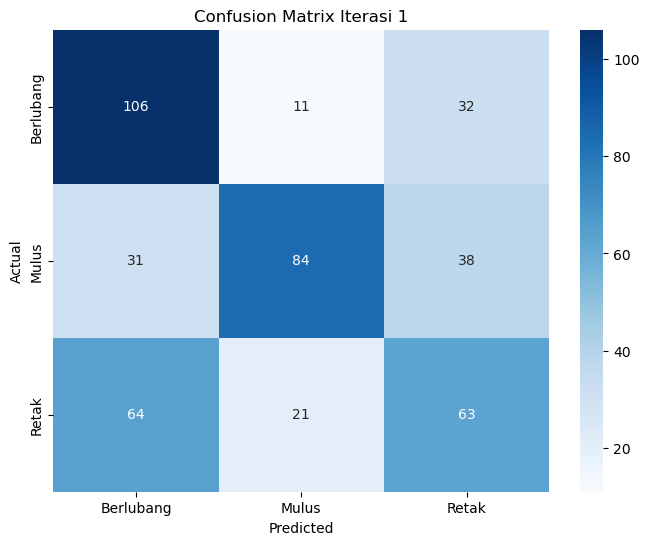



--- Iterasi 2 dengan random_state=10 ---
Waktu pelatihan: 0.0000 detik
Akurasi: 57.78%
Laporan Klasifikasi:
              precision    recall  f1-score   support

   Berlubang       0.52      0.70      0.59       146
       Mulus       0.73      0.68      0.71       146
       Retak       0.50      0.37      0.42       158

    accuracy                           0.58       450
   macro avg       0.58      0.58      0.57       450
weighted avg       0.58      0.58      0.57       450



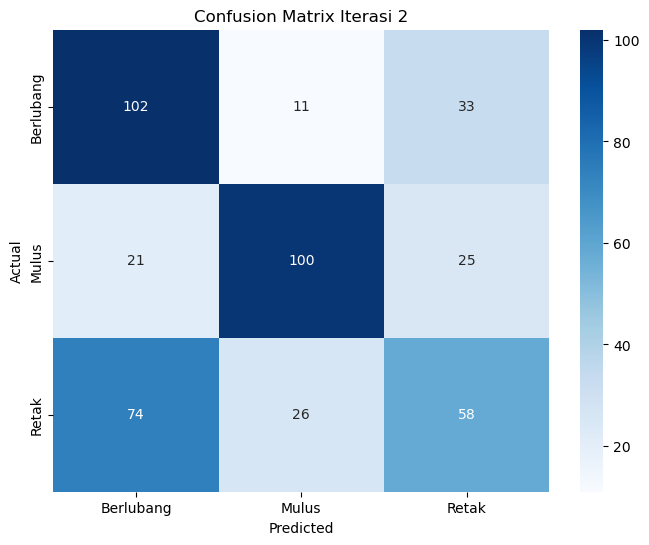



--- Iterasi 3 dengan random_state=100 ---
Waktu pelatihan: 0.0017 detik
Akurasi: 55.11%
Laporan Klasifikasi:
              precision    recall  f1-score   support

   Berlubang       0.50      0.65      0.56       141
       Mulus       0.72      0.64      0.68       161
       Retak       0.44      0.36      0.40       148

    accuracy                           0.55       450
   macro avg       0.55      0.55      0.55       450
weighted avg       0.56      0.55      0.55       450



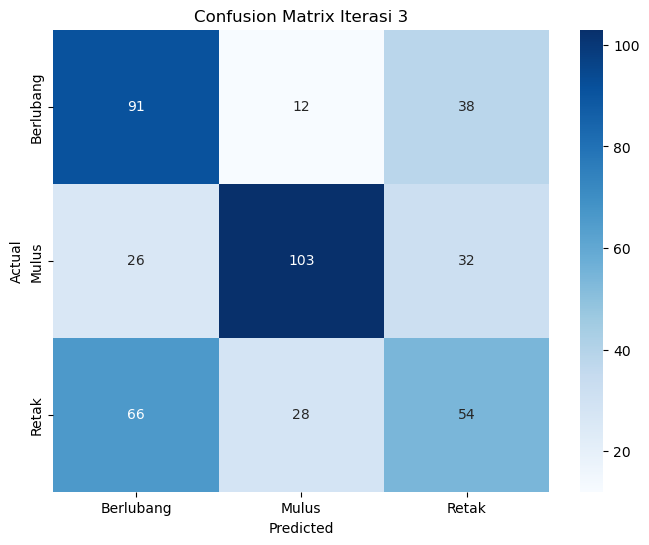



--- Iterasi 4 dengan random_state=1000 ---
Waktu pelatihan: 0.0000 detik
Akurasi: 56.22%
Laporan Klasifikasi:
              precision    recall  f1-score   support

   Berlubang       0.52      0.62      0.57       155
       Mulus       0.68      0.70      0.69       131
       Retak       0.50      0.40      0.44       164

    accuracy                           0.56       450
   macro avg       0.57      0.57      0.57       450
weighted avg       0.56      0.56      0.56       450



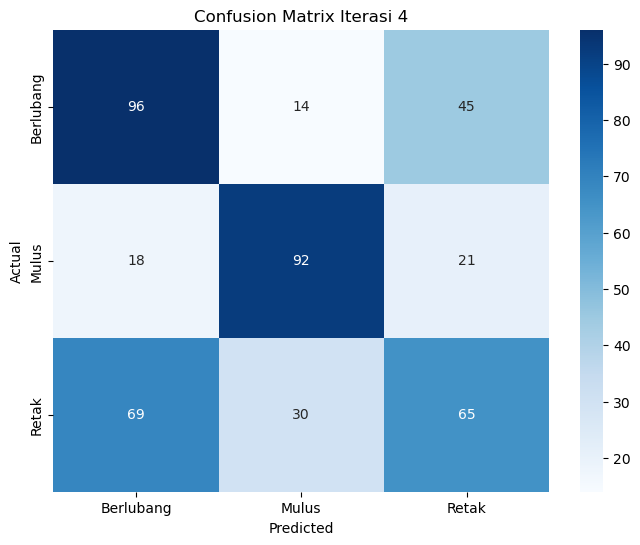



--- Iterasi 5 dengan random_state=10000 ---
Waktu pelatihan: 0.0000 detik
Akurasi: 57.78%
Laporan Klasifikasi:
              precision    recall  f1-score   support

   Berlubang       0.55      0.70      0.62       145
       Mulus       0.72      0.60      0.65       154
       Retak       0.48      0.44      0.46       151

    accuracy                           0.58       450
   macro avg       0.58      0.58      0.58       450
weighted avg       0.58      0.58      0.58       450



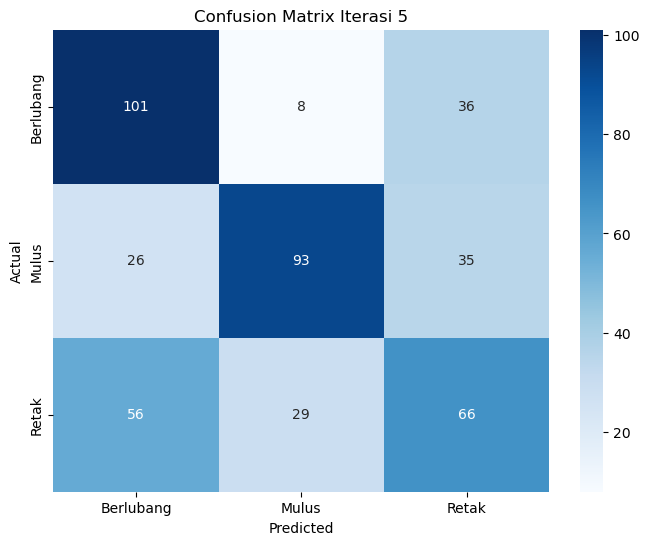



Rata-rata Akurasi selama 5 iterasi: 56.62%


In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time  # Import modul time untuk menghitung waktu

# Konversi fitur GLCM ke dalam array NumPy
X = df_glcm.iloc[:, :-2].values  # Ambil semua kolom kecuali kolom 'class' dan 'file_name'
y = df_glcm['class'].values  # Ambil kolom 'class' sebagai label

# Definisikan random states untuk setiap iterasi
random_states = [1, 10, 100, 1000, 10000]

# List untuk menyimpan akurasi setiap iterasi
accuracies = []

# Jalankan model 5 kali dengan random state yang ditentukan
for idx, random_state in enumerate(random_states):
    print(f"--- Iterasi {idx + 1} dengan random_state={random_state} ---")

    # Pembagian data menjadi 70% training dan 30% testing dengan random state yang spesifik
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # Inisialisasi model KNN dengan jumlah tetangga terdekat
    model = KNeighborsClassifier(n_neighbors=3)

    # Mulai pengukuran waktu pelatihan
    start_time = time.time()

    # Melatih model
    model.fit(X_train, y_train)

    # Hitung waktu pelatihan
    training_time = time.time() - start_time
    print(f"Waktu pelatihan: {training_time:.4f} detik")

    # Prediksi pada set pengujian
    y_pred = model.predict(X_test)

    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)  # Simpan akurasi untuk iterasi ini
    print(f"Akurasi: {accuracy * 100:.2f}%")

    # Cetak laporan klasifikasi yang lebih detail
    print("Laporan Klasifikasi:")
    print(classification_report(y_test, y_pred))

    # Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix Iterasi {idx + 1}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("\n")

# Hitung dan cetak rata-rata akurasi
average_accuracy = np.mean(accuracies)
print(f"Rata-rata Akurasi selama 5 iterasi: {average_accuracy * 100:.2f}%")

# Contoh Hasil Tes Prediksi Gambar

Prediksi Kelas untuk gambar dataset/Berlubang/(3).png: Berlubang


C:\Users\Fenny Jong\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


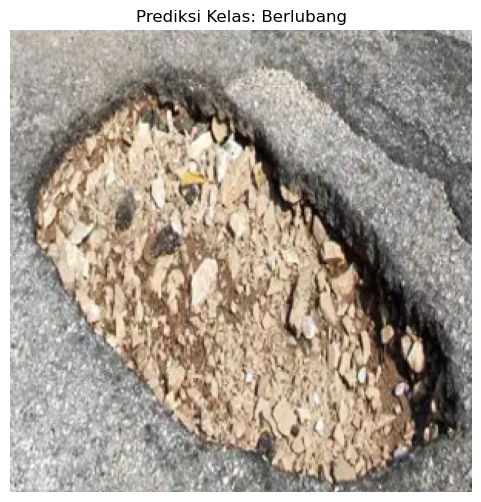

In [15]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from PIL import Image

def calc_glcm_all_angles(img, label, props, dists=[1], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, sym=True, norm=True):
    # Pastikan gambar dalam rentang 0-255
    img = (img * (levels - 1) / np.max(img)).astype(np.uint8)
    
    # Hitung GLCM
    glcm = graycomatrix(img, distances=dists, angles=agls, levels=levels, symmetric=sym, normed=norm)
    
    # Ekstraksi fitur
    feature = []
    for prop in props:
        # Ekstraksi properti untuk setiap sudut
        prop_values = graycoprops(glcm, prop)
        feature.extend(prop_values.flatten())
    
    feature.append(label)
    return feature

def extract_features(image_path, properties=['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']):
    # Baca gambar
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Tidak dapat membaca gambar: {image_path}")
    
    # Normalisasi gambar
    img = img / 255.0
    
    # Ekstraksi fitur
    features = calc_glcm_all_angles(img, 0, properties)
    
    return features[:-1]  # Hapus label terakhir

# Path ke dataset dan file CSV
path = 'dataset'
csv_path = os.path.join(path, 'extracted_features_glcm.csv')

# Load data latih dari CSV
df_train = pd.read_csv(csv_path)

# Persiapan data untuk klasifikasi
X = df_train.drop(['class', 'file_name'], axis=1)
y = df_train['class']

# Encode label kelas
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Latih model KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Contoh prediksi gambar uji
test_image_path = "dataset/Berlubang/(3).png"  # Sesuaikan path

# Ekstraksi fitur gambar uji
test_features = extract_features(test_image_path)

# Normalisasi fitur uji dengan scaler yang sama
# Pastikan test_features berbentuk 2D array
test_features_scaled = scaler.transform(np.array(test_features).reshape(1, -1))

# Prediksi
predicted_class_encoded = model.predict(test_features_scaled)
predicted_class = le.inverse_transform(predicted_class_encoded)

print(f"Prediksi Kelas untuk gambar {test_image_path}: {predicted_class[0]}")

# Tampilkan gambar
image = Image.open(test_image_path)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.title(f"Prediksi Kelas: {predicted_class[0]}")
plt.show()

Prediksi Kelas untuk gambar dataset/Mulus/(201).png: Mulus


C:\Users\Fenny Jong\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


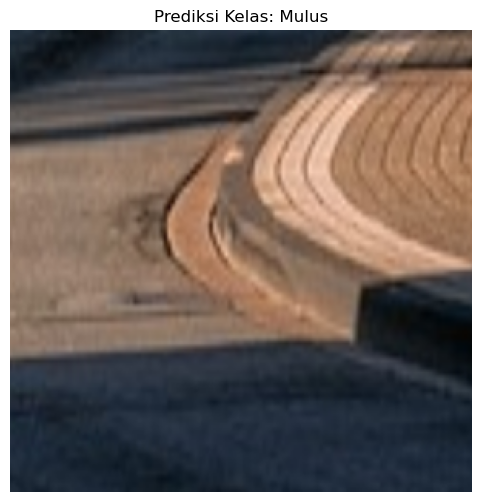

In [16]:
# Contoh prediksi gambar uji
test_image_path = "dataset/Mulus/(201).png"  # Sesuaikan path

# Ekstraksi fitur gambar uji
test_features = extract_features(test_image_path)

# Normalisasi fitur uji dengan scaler yang sama
# Pastikan test_features berbentuk 2D array
test_features_scaled = scaler.transform(np.array(test_features).reshape(1, -1))

# Prediksi
predicted_class_encoded = model.predict(test_features_scaled)
predicted_class = le.inverse_transform(predicted_class_encoded)

print(f"Prediksi Kelas untuk gambar {test_image_path}: {predicted_class[0]}")

# Tampilkan gambar
image = Image.open(test_image_path)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.title(f"Prediksi Kelas: {predicted_class[0]}")
plt.show()

Prediksi Kelas untuk gambar dataset/Retak/(300).jpg: Retak


C:\Users\Fenny Jong\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


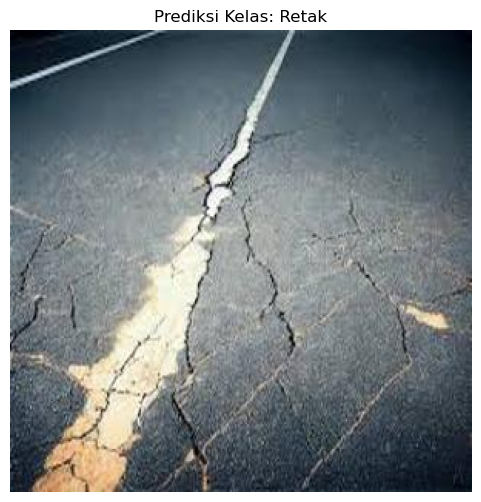

In [17]:
# Contoh prediksi gambar uji
test_image_path = "dataset/Retak/(300).jpg"  # Sesuaikan path

# Ekstraksi fitur gambar uji
test_features = extract_features(test_image_path)

# Normalisasi fitur uji dengan scaler yang sama
# Pastikan test_features berbentuk 2D array
test_features_scaled = scaler.transform(np.array(test_features).reshape(1, -1))

# Prediksi
predicted_class_encoded = model.predict(test_features_scaled)
predicted_class = le.inverse_transform(predicted_class_encoded)

print(f"Prediksi Kelas untuk gambar {test_image_path}: {predicted_class[0]}")

# Tampilkan gambar
image = Image.open(test_image_path)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.title(f"Prediksi Kelas: {predicted_class[0]}")
plt.show()